In [1]:
%%capture
!pip install mlflow
!pip install pyngrok

In [2]:
!pip install mlflow pyngrok -q

In [3]:
import mlflow
import subprocess
from pyngrok import ngrok, conf
import getpass

#executar o mlflow no inicia e salva no banco de dados local
MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"
subprocess.Popen(["mlflow", "ui", "--backend-store-uri", MLFLOW_TRACKING_URI])


mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
# mlflow will create an experiment if it doesn't exist


print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth")
conf.get_default().auth_token = getpass.getpass()
port=5000
public_url = ngrok.connect(port).public_url
print(f' * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\"')

2023/12/18 00:42:06 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2023/12/18 00:42:06 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d4b8295536_create_latest_metrics_table_py] Migration complete!
INFO  

Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth
··········
 * ngrok tunnel "https://f3ae-35-193-234-155.ngrok-free.app" -> "http://127.0.0.1:5000"


In [ ]:
!nvidia-smi

Sun Dec 17 19:03:25 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Install dependencies

In [4]:
!pip install transformers datasets evaluate rouge_score accelerate -U -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.9 MB/s eta 0:00:00


In [5]:
!pip install sentencepiece -U -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.0 MB/s eta 0:00:00


In [6]:
from transformers import pipeline, set_seed

import matplotlib.pyplot as plt

import pandas as pd
from datasets import load_dataset, load_metric

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

import nltk
from nltk.tokenize import sent_tokenize

from tqdm import tqdm
import torch

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
from datasets import load_dataset

In [8]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

device = "cuda" if torch.cuda.is_available() else "cpu"

In [9]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

model_checkpoint = "VictorNGomes/pttmario5"
t5_model = T5ForConditionalGeneration.from_pretrained(model_checkpoint)
t5_tokenizer = T5Tokenizer.from_pretrained(model_checkpoint)

config.json:   0%|          | 0.00/791 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/756k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.59k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [10]:
def generate_batch_sized_chunks(list_of_elements, batch_size):
    """split the dataset into smaller batches that we can process simultaneously
    Yield successive batch-sized chunks from list_of_elements.

    Yields consecutive chunks from a list.

    Args:
        list_of_elements (List[Any]): The list to be divided into chunks.
        batch_size (int): The size of chunks.

    Yields:
        List[Any]: A chunk from the list of the specified size.

    """
    for i in range(0, len(list_of_elements), batch_size):
        yield list_of_elements[i : i + batch_size]

def calculate_metric_on_test_ds(dataset, metric, model, tokenizer,
                               batch_size=8, device=device,
                               column_text="texto",
                               column_summary="sumario"):
    """
    Calculates a specified metric on a test dataset.

    Args:
        dataset (Dataset): The dataset to evaluate.
        metric (Metric): The metric to calculate.
        model (nn.Module): The model to evaluate.
        tokenizer (Tokenizer): The tokenizer to use for text processing.
        batch_size (int, optional): The batch size for evaluation.
        device (torch.device, optional): The device to use for computation.
        column_text (str, optional): The name of the text column in the dataset.
        column_summary (str, optional): The name of the summary column in the dataset.

    Returns:
        Dict[str, float]: The calculated metric scores.
    """
    article_batches = list(generate_batch_sized_chunks(dataset[column_text], batch_size))
    target_batches = list(generate_batch_sized_chunks(dataset[column_summary], batch_size))

    for article_batch, target_batch in tqdm(
        zip(article_batches, target_batches), total=len(article_batches)):

        inputs = tokenizer(article_batch, max_length=1024,  truncation=True,
                        padding="max_length", return_tensors="pt")

        summaries = model.generate(input_ids=inputs["input_ids"].to(device),
                         attention_mask=inputs["attention_mask"].to(device),
                         length_penalty=0.8, num_beams=8, max_length=128)
        ''' parameter for length penalty ensures that the model does not generate sequences that are too long. '''

        # Finally, we decode the generated texts,
        # replace the <n> token, and add the decoded texts with the references to the metric.
        decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True,
                                clean_up_tokenization_spaces=True)
               for s in summaries]

        decoded_summaries = [d.replace("<n>", " ") for d in decoded_summaries]


        metric.add_batch(predictions=decoded_summaries, references=target_batch)

    #  Finally compute and return the ROUGE scores.
    score = metric.compute()
    return score

## [XLsum - Portuguese](www.google.com)


In [11]:
dataset_xlsum_pt = load_dataset("csebuetnlp/xlsum",'portuguese'),

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

In [12]:
dataset_xlsum_pt[0]

DatasetDict({
    train: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 57402
    })
    test: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 7175
    })
    validation: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 7175
    })
})

### Evaluating Tr on temario

In [13]:
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

rouge_metric = load_metric('rouge')

#score = calculate_metric_on_test_ds(dataset_samsum['test'], rouge_metric, t5_model, t5_tokenizer, column_text = 'texto', column_summary='sumario', batch_size=8 )

<ipython-input-13-1a21f05207d0>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge_metric = load_metric('rouge')


## Histogram

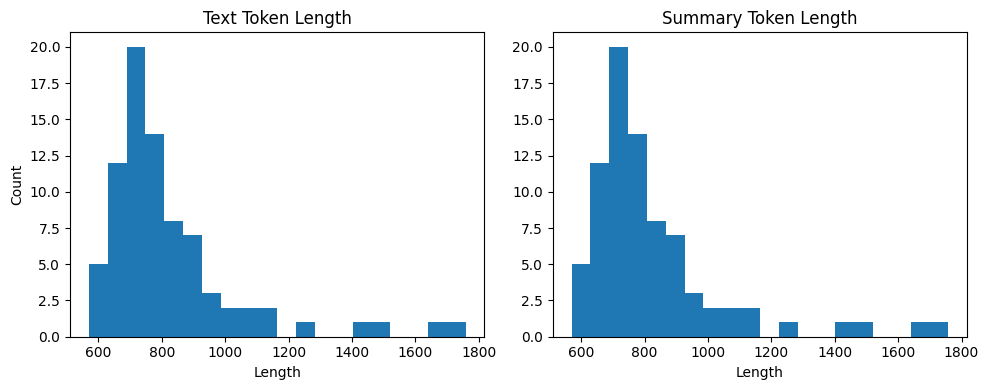

In [ ]:
dialogue_token_len =[]
summary_token_len =[]

for i in dataset_samsum['train']['texto']:
  dialogue_token_len.append(len(t5_tokenizer.encode(i)))

for i in dataset_samsum['train']['texto']:
  summary_token_len.append(len(t5_tokenizer.encode(i)))


fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(dialogue_token_len, bins = 20 )
axes[0].set_title("Text Token Length")
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Count")

axes[1].hist(summary_token_len, bins = 20 )
axes[1].set_title("Summary Token Length")
axes[1].set_xlabel("Length")
plt.tight_layout()
plt.show()

In [14]:
prefix = "summarize: "


def convert_examples_to_features(example_batch):
    inputs = [prefix + doc for doc in example_batch['text']]
    input_encodings = t5_tokenizer(inputs , max_length = 1024, truncation = True )

    with t5_tokenizer.as_target_tokenizer():
        target_encodings = t5_tokenizer(example_batch['summary'], max_length = 128, truncation = True )

    return {
        'input_ids' : input_encodings['input_ids'],
        'attention_mask': input_encodings['attention_mask'],
        'labels': target_encodings['input_ids']
    }

#dataset_samsum_pt = dataset_samsum.map(convert_examples_to_features, batched = True)

dataset_xlsum_pt_with_tokens = dataset_xlsum_pt[0].map(convert_examples_to_features, batched = True)



Map:   0%|          | 0/57402 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3860: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/7175 [00:00<?, ? examples/s]

Map:   0%|          | 0/7175 [00:00<?, ? examples/s]

In [15]:
dataset_xlsum_pt_with_tokens

DatasetDict({
    train: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 57402
    })
    test: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 7175
    })
    validation: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 7175
    })
})

In [16]:
from transformers import DataCollatorForSeq2Seq

seq2seq_data_collator = DataCollatorForSeq2Seq(t5_tokenizer, model=t5_model)

In [17]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from transformers import TrainingArguments, Trainer
import mlflow
import mlflow.pytorch
import pandas as pd
from huggingface_hub import notebook_login



# Define your MLflow experiment
mlflow.set_experiment("finetuning-ptt5-base-xlsum")



# Start an MLflow run
with mlflow.start_run():

    # Your machine learning code here
    trainer_args = TrainingArguments(
        output_dir='xlsum_pt',
        num_train_epochs=1,
        warmup_steps=500,
        per_device_train_batch_size=2,
        per_device_eval_batch_size=2,
        weight_decay=0.01,
        logging_steps=10,
        evaluation_strategy='steps',
        eval_steps=500,
        save_steps=1e6,
        gradient_accumulation_steps=16,
        push_to_hub=True,
        fp16=True,
        hub_model_id='VictorNGomes/pttmario5',
        hub_token='#your_token'
    )

    trainer = Trainer(model=t5_model, args=trainer_args,
                      tokenizer=t5_tokenizer, data_collator=seq2seq_data_collator,
                      train_dataset=dataset_xlsum_pt_with_tokens["train"],
                      eval_dataset=dataset_xlsum_pt_with_tokens["validation"])

    trainer.train()

    # Log parameters and metrics to MLflow
    mlflow.log_params(trainer_args.to_dict())

    # Log custom metrics (e.g., Rouge scores)
    score = calculate_metric_on_test_ds(
    dataset_xlsum_pt['test'], rouge_metric, trainer.model, t5_tokenizer, batch_size = 1, column_text = 'text', column_summary= 'summary'
)

    rouge_dict = {rn: score[rn].mid.fmeasure for rn in rouge_names}
    df_rouge = pd.DataFrame(rouge_dict, index=['ptt5-temario'])
    print(df_rouge)

# Log specific ROUGE scores using MLflow
    for rouge_type in ["rouge1", "rouge2", "rougeL", "rougeLsum"]:
      rouge_score = rouge_dict.get(rouge_type, 0.0)  # Default to 0.0 if the metric is not present
      mlflow.log_metric(f'{rouge_type}_fmeasure', rouge_score)

    # Save the model to MLflow




2023/12/18 01:00:32 INFO mlflow.tracking.fluent: Experiment with name 'finetuning-ptt5-base-xlsum' does not exist. Creating a new experiment.


Step,Training Loss,Validation Loss
500,2.825300,2.435522
1000,2.691700,2.346667


In [ ]:
trainer.push_to_hub()

In [ ]:
pipe = pipeline("summarization", model=model_checkpoint)

with mlflow.start_run():
    mlflow.transformers.log_model(
        transformers_model=pipe,
        artifact_path="my_pipeline",
    )


# Gradio


In [ ]:
import gradio as gr
from transformers import pipeline

def summarize_text(text):
    # Use the summarization pipeline to generate a summary
    summary = pipe(text, max_length=150, min_length=50, length_penalty=2.0, num_beams=4)[0]['summary_text']
    return summary

iface = gr.Interface(
    fn=summarize_text,
    inputs=gr.Textbox(),
    outputs=gr.Textbox(),
    live=True,
    interpretation="default",
    analytics_enabled=False
)

iface.launch()


